This colab is for the exercise 2.

In [19]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

%config Completer.use_jedi = False
warnings.filterwarnings('ignore')
sns.set()

# Get the data from Yahoo Finance
ticker = 'TSM'
start_date = '2000-09-15'
end_date = '2021-10-02'
data = yf.download(ticker, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [20]:
data = yf.download(ticker, start_date, end_date)['Adj Close']
df = pd.DataFrame(data)
df = df.rename(columns={"Adj Close": "TSM"})
# define simple and log returns
df['simple'] = df['TSM'] / df['TSM'].shift(1) - 1
df['log'] = np.log(df['TSM'] / df['TSM'].shift(1))

[*********************100%%**********************]  1 of 1 completed


In [21]:
# drop na and show tail
df = df.dropna()
df.tail()

,TSM,simple,log
Date,,,
2021-09-27,111.068581,0.004410,0.004401
2021-09-28,107.004524,-0.036591,-0.037277
2021-09-29,106.736771,-0.002502,-0.002505
2021-09-30,106.765457,0.000269,0.000269
2021-10-01,106.679382,-0.000806,-0.000807


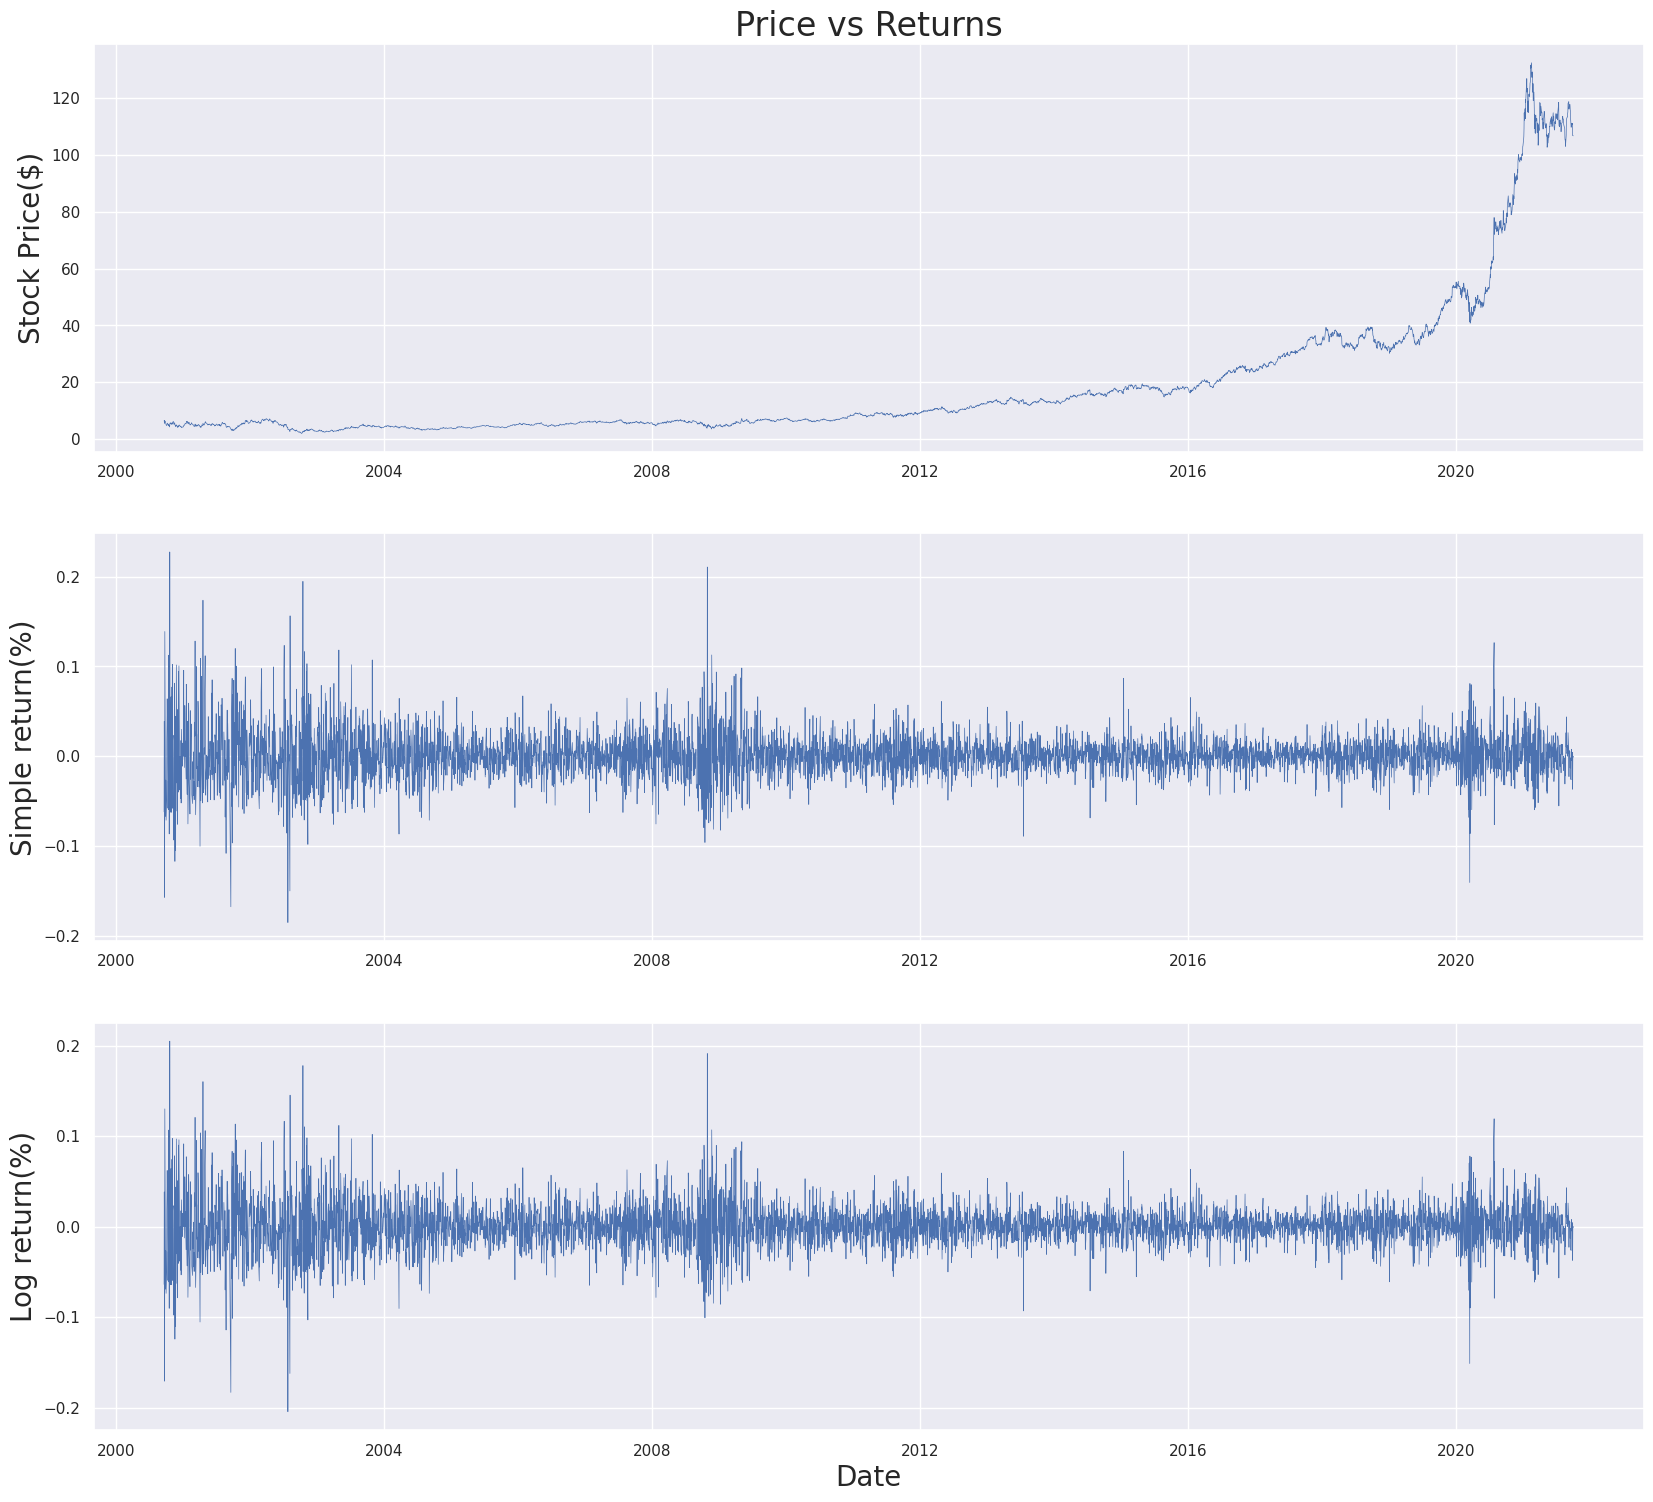

In [22]:
fig, ax = plt.subplots(nrows=3, figsize=(20,18))
ax[0].plot(df['TSM'], linewidth=0.5)
ax[0].set_title('Price vs Returns', fontsize=24)
ax[0].set_ylabel('Stock Price($)', fontsize=20);
ax[1].plot(df['simple'], linewidth=0.5)
ax[1].set_ylabel('Simple return(%)', fontsize=20);
ax[2].plot(df['log'], linewidth=0.5)
ax[2].set_xlabel('Date', fontsize=20)
ax[2].set_ylabel('Log return(%)', fontsize=20);

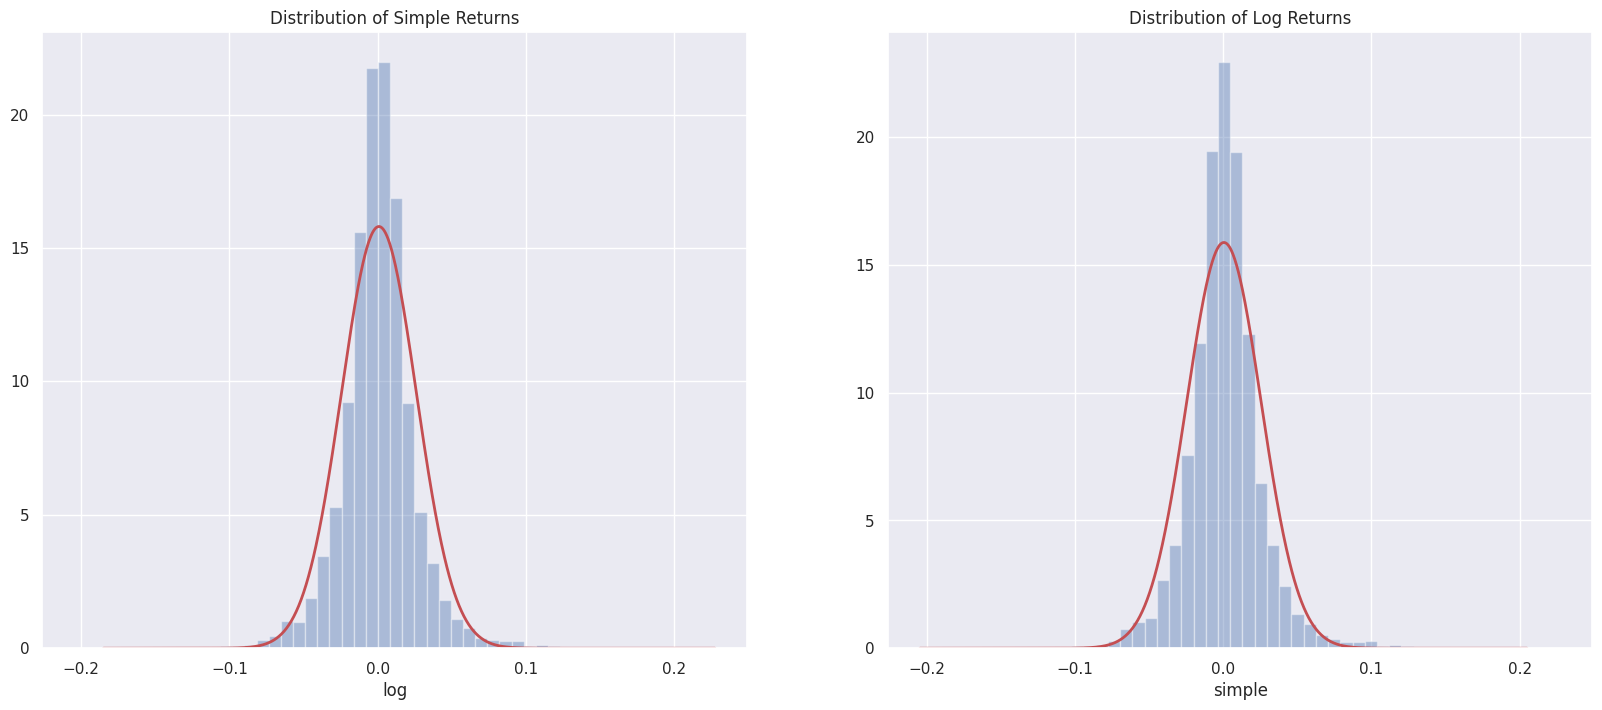

In [23]:
import scipy.stats as scs
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with stock data

# Plotting the distribution of log returns
fig, ax = plt.subplots(ncols=2, figsize=(20, 8))

# Plot for simple returns
sns.distplot(df['simple'], kde=False, norm_hist=True, ax=ax[1])
xx = np.linspace(min(df['simple']), max(df['simple']), num=1000)
yy = scs.norm.pdf(xx, loc=df['simple'].mean(), scale=df['simple'].std())
ax[0].plot(xx, yy, 'r', lw=2)
ax[0].set_title('Distribution of Simple Returns')


# Plot for log returns
sns.distplot(df['log'], kde=False, norm_hist=True, ax=ax[0])
xx = np.linspace(min(df['log']), max(df['log']), num=1000)
yy = scs.norm.pdf(xx, loc=df['log'].mean(), scale=df['log'].std())
ax[1].plot(xx, yy, 'r', lw=2)
ax[1].set_title('Distribution of Log Returns')

plt.show()

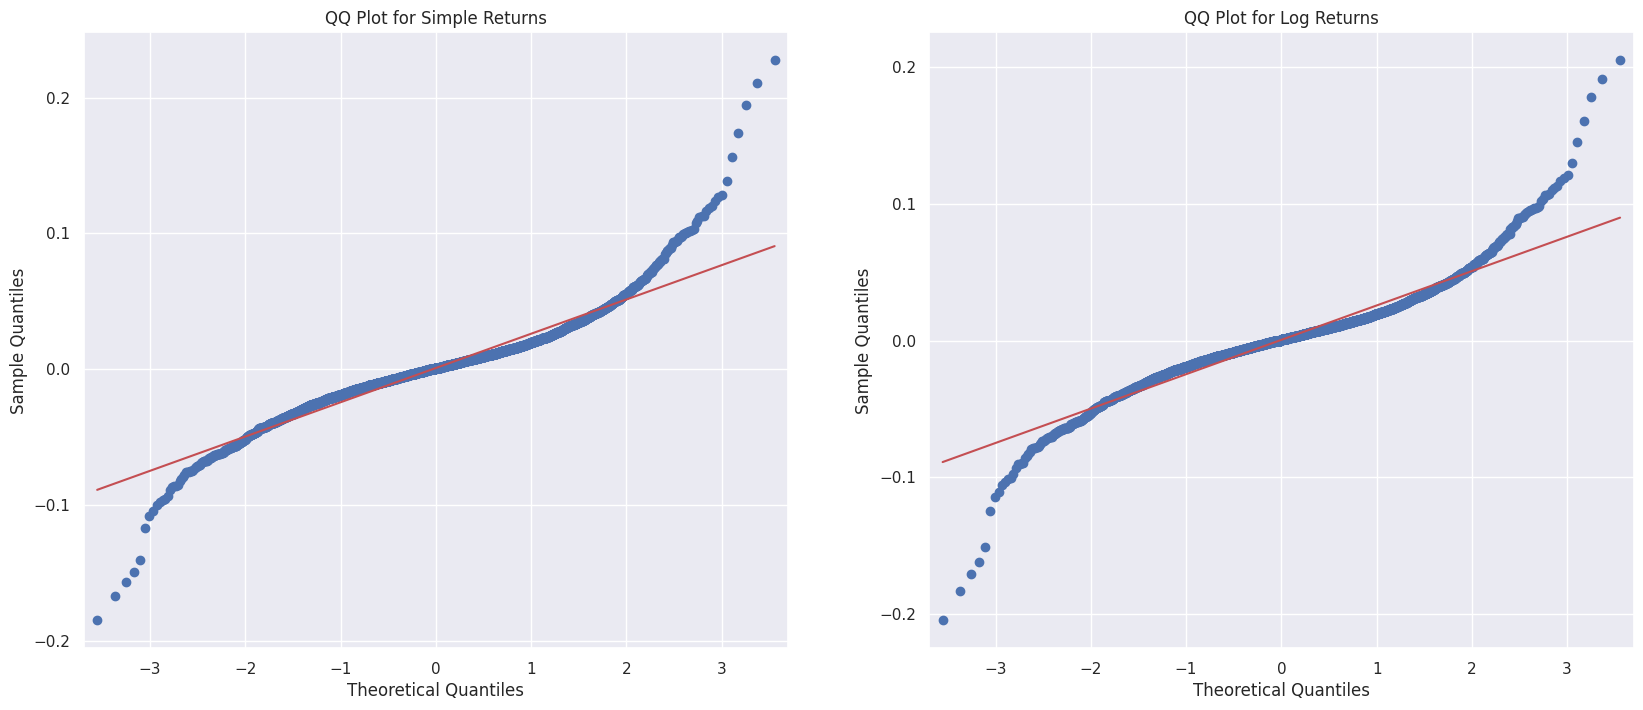

In [24]:
import statsmodels.api as sm

# Assuming df is your DataFrame with log returns

# Plotting the distribution of log returns and QQ plot
fig, ax = plt.subplots(ncols=2, figsize=(20, 8))

# QQ plot for simple returns
sm.qqplot(df['simple'].values, line='s', ax=ax[0])
ax[0].set_title('QQ Plot for Simple Returns')


# QQ plot for log returns
sm.qqplot(df['log'].values, line='s', ax=ax[1])
ax[1].set_title('QQ Plot for Log Returns')

plt.show()

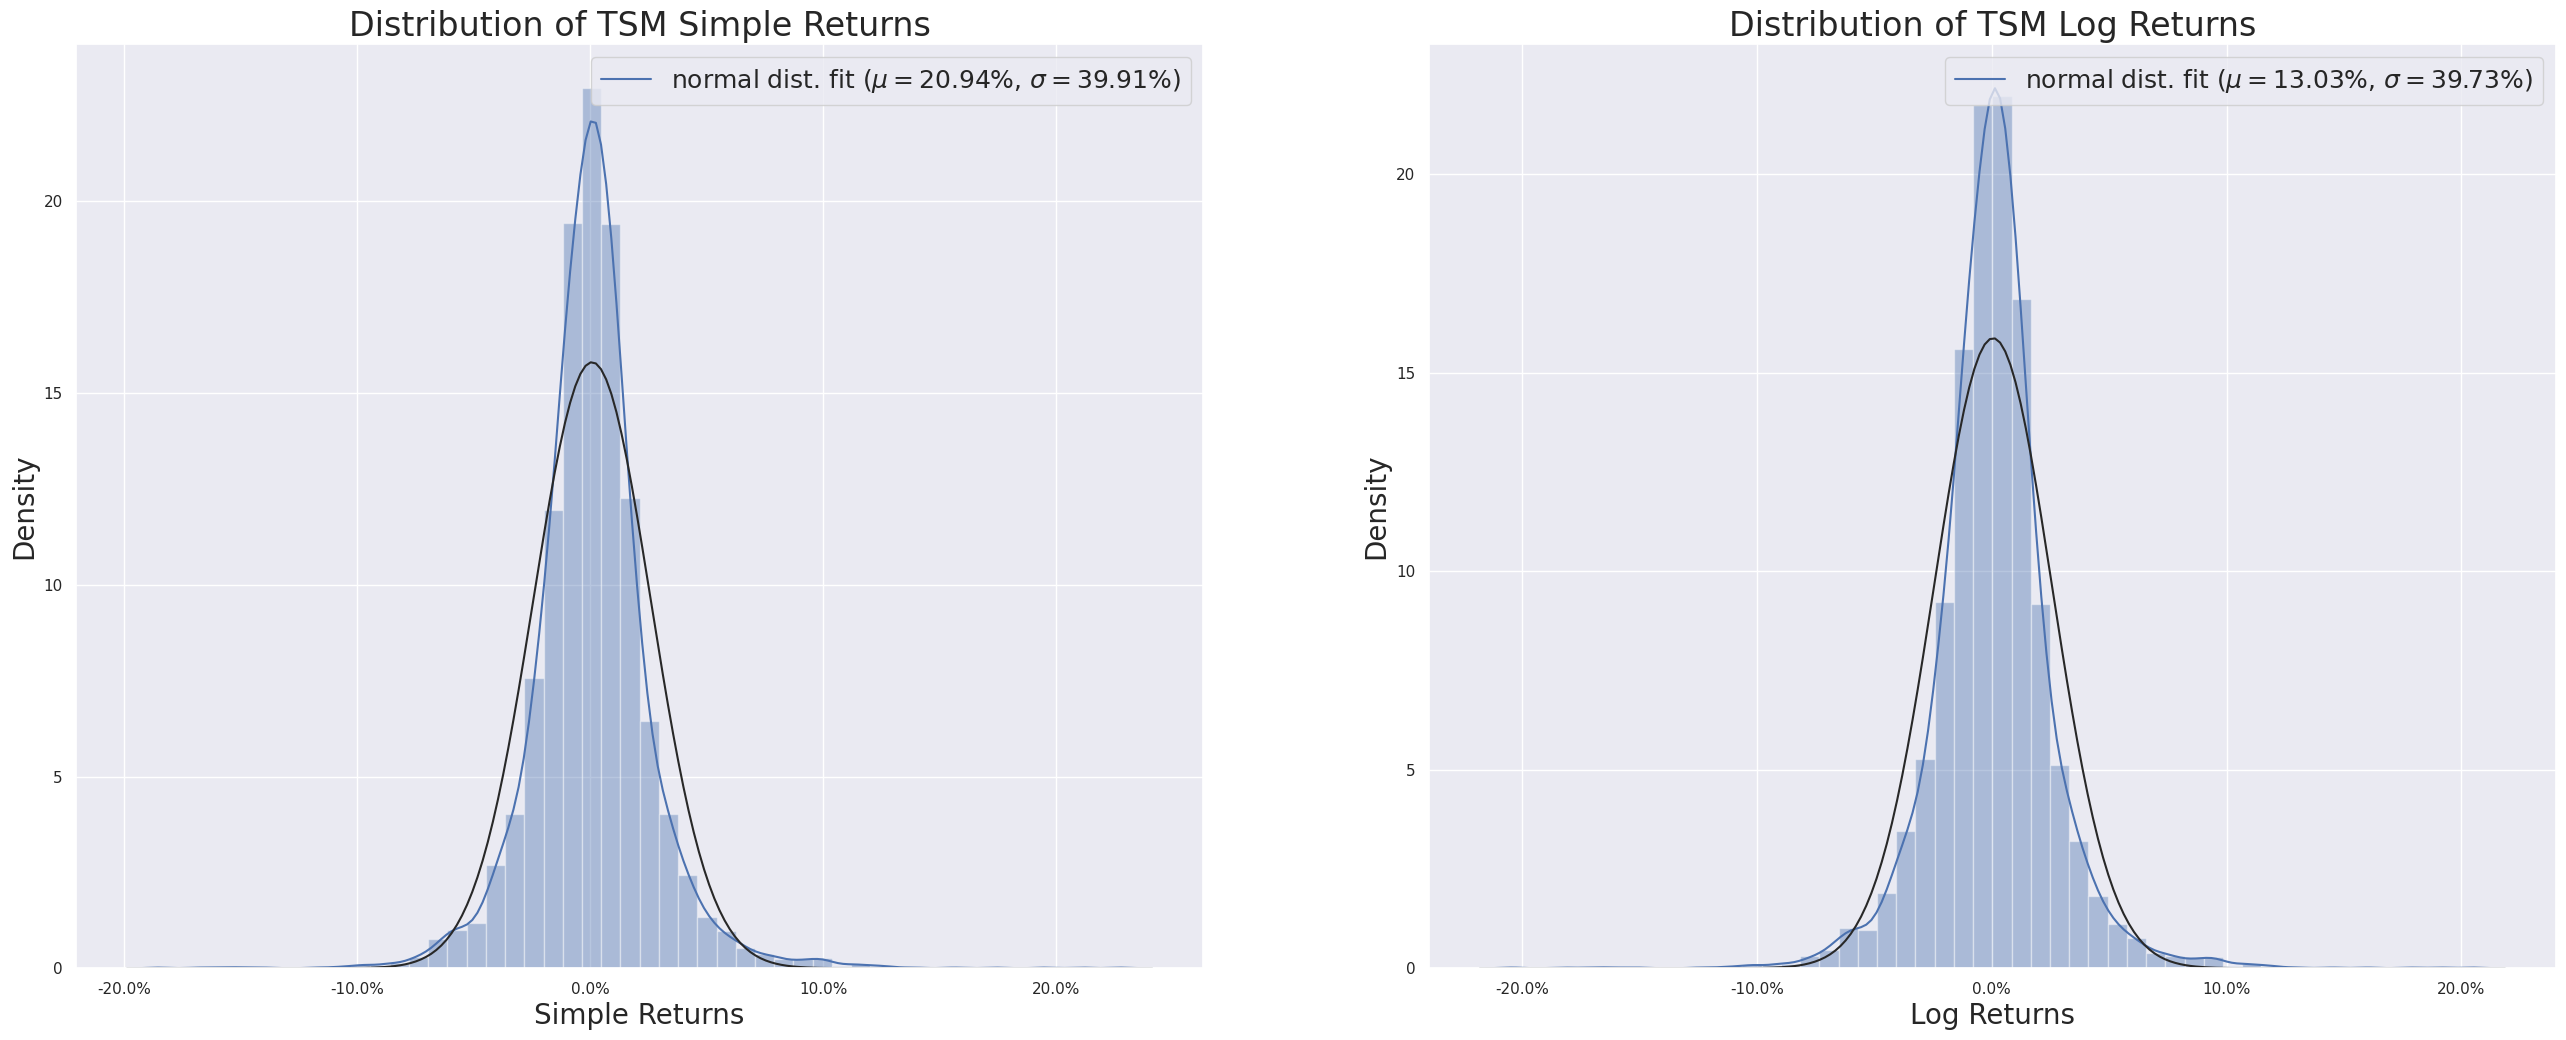

In [25]:
import scipy.stats as stats
days = 250
# plot the distribution of returns
# create the figure
fig, ax = plt.subplots(ncols=2, figsize=(32,12))

# fit a dist plot
sns.distplot(df['simple'], fit=stats.norm, ax=ax[0]);
sns.distplot(df['log'], fit=stats.norm, ax=ax[1]);

# compute the params of the fitted normal curve
(mu, s) = stats.norm.fit(df['simple'])
ax[0].set_title('Distribution of TSM Simple Returns', fontsize=24)
ax[0].set_xlabel('Simple Returns', fontsize=20)
ax[0].set_ylabel('Density', fontsize=20)
ax[0].set_xticklabels(['{:,.1%}'.format(x) for x in ax[0].get_xticks()]);
ax[0].legend(["normal dist. fit ($\mu=${0:,.2%}, $\sigma=${1:,.2%})".format(mu*days, s*np.sqrt(days))], fontsize=18);

# compute the params of the fitted normal curve
(mu, s) = stats.norm.fit(df['log'])
ax[1].set_title('Distribution of TSM Log Returns', fontsize=24)
ax[1].set_xlabel('Log Returns', fontsize=20)
ax[1].set_ylabel('Density', fontsize=20)
ax[1].set_xticklabels(['{:,.1%}'.format(x) for x in ax[1].get_xticks()]);
ax[1].legend(["normal dist. fit ($\mu=${0:,.2%}, $\sigma=${1:,.2%})".format(mu*days, s*np.sqrt(days))], fontsize=18);

In [26]:
# Descriptive statistics ----
print('Range of dates:', min(df.index.date), '-', max(df.index.date))
print('Number of observations:', df.shape[0])
print('Mean: {0:.4f}'.format(df.simple.mean()))
print('Median: {0:.4f}'.format(df.simple.median()))
print('Min: {0:.4f}'.format(df.simple.min()))
print('Max: {0:.4f}'.format(df.simple.max()))
print('Standard Deviation: {0:.4f}'.format(df.simple.std()))
print('Skewness: {0:.4f}'.format(df.simple.skew()))
print('Kurtosis: {0:.4f}'.format(df.simple.kurtosis())) #Kurtosis of std. Normal dist = 0
print('Jarque-Bera statistic: {stat:.2f} with p-value: {p_val:.2f}'.format(stat = scs.jarque_bera(df.simple.values)[0],
                                                                           p_val = scs.jarque_bera(df.simple.values)[1]))

Range of dates: 2000-09-18 - 2021-10-01
Number of observations: 5294
Mean: 0.0008
Median: 0.0006
Min: -0.1849
Max: 0.2274
Standard Deviation: 0.0252
Skewness: 0.4959
Kurtosis: 7.2233
Jarque-Bera statistic: 11700.78 with p-value: 0.00


In [27]:
# Descriptive statistics ----
print('Range of dates:', min(df.index.date), '-', max(df.index.date))
print('Number of observations:', df.shape[0])
print('Mean: {0:.4f}'.format(df.log.mean()))
print('Median: {0:.4f}'.format(df.log.median()))
print('Min: {0:.4f}'.format(df.log.min()))
print('Max: {0:.4f}'.format(df.log.max()))
print('Standard Deviation: {0:.4f}'.format(df.log.std()))
print('Skewness: {0:.4f}'.format(df.log.skew()))
print('Kurtosis: {0:.4f}'.format(df.log.kurtosis())) #Kurtosis of std. Normal dist = 0
print('Jarque-Bera statistic: {stat:.2f} with p-value: {p_val:.2f}'.format(stat = scs.jarque_bera(df.log.values)[0],
                                                                           p_val = scs.jarque_bera(df.log.values)[1]))

Range of dates: 2000-09-18 - 2021-10-01
Number of observations: 5294
Mean: 0.0005
Median: 0.0006
Min: -0.2045
Max: 0.2049
Standard Deviation: 0.0251
Skewness: 0.1650
Kurtosis: 6.7554
Jarque-Bera statistic: 10068.06 with p-value: 0.00


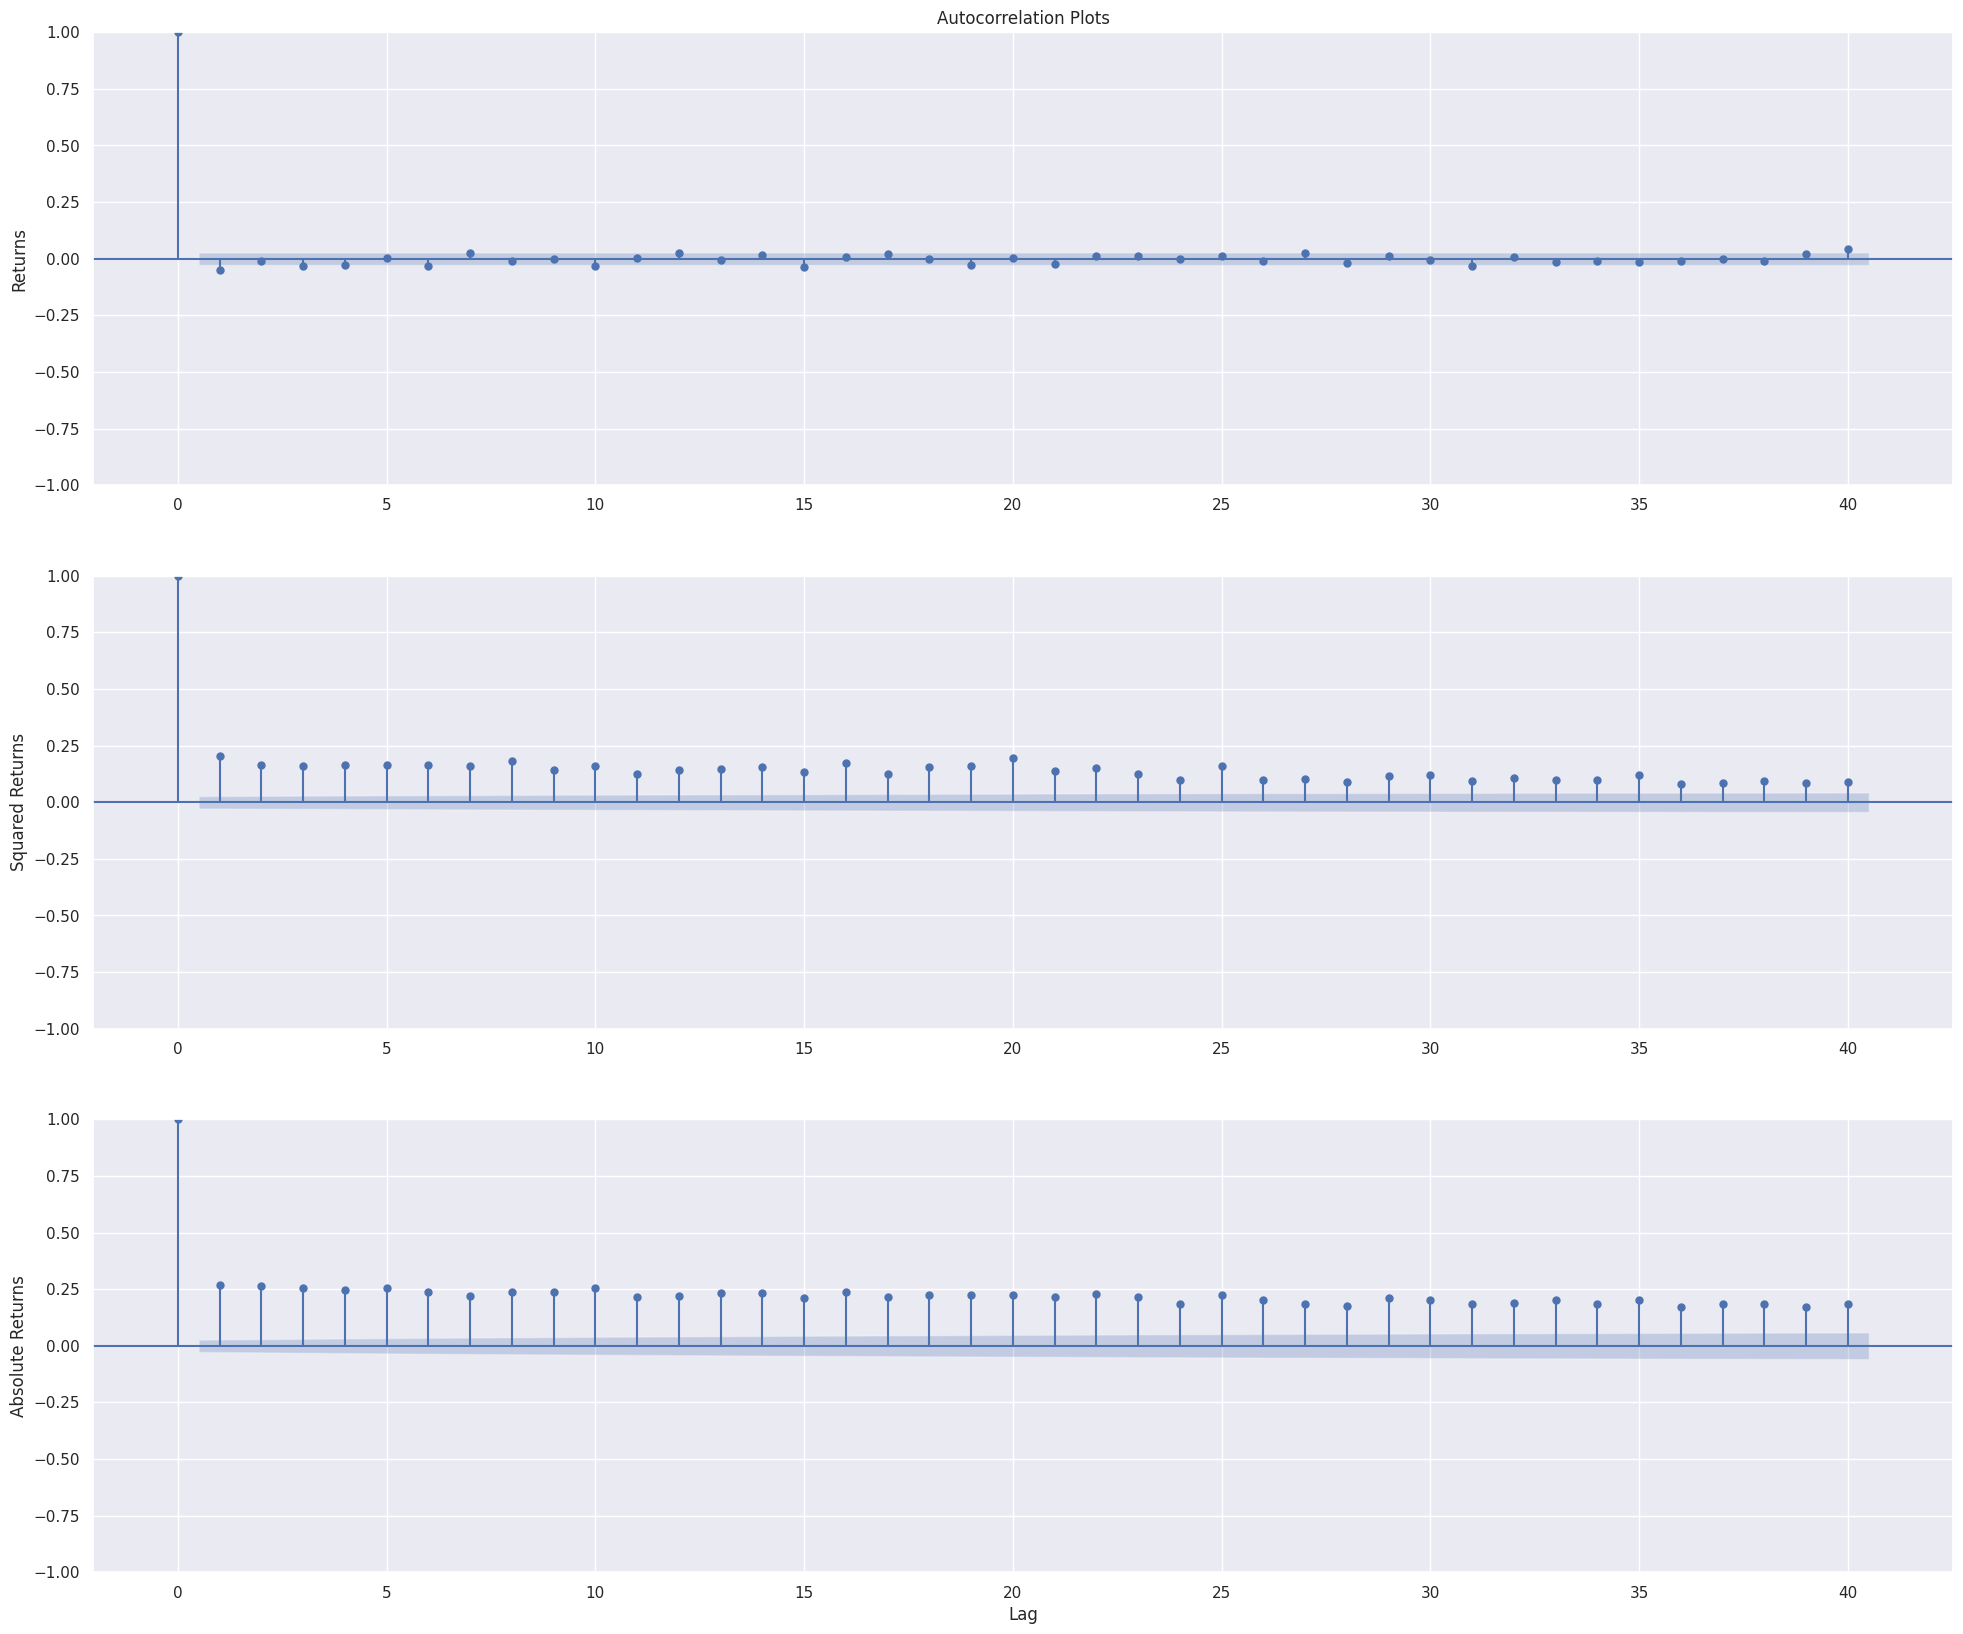

In [28]:
import statsmodels.tsa.api as smt
# Autocorrelation plot of log returns and squared/absolute versions ----

# specify the max amount of lags
lags = 40

fig, ax =plt.subplots(3, 1, figsize=(24, 20))
# returns ----
smt.graphics.plot_acf(df.log, lags=lags , alpha=0.05, ax = ax[0])
ax[0].set_ylabel('Returns')
ax[0].set_title('Autocorrelation Plots')
# squared returns ----
smt.graphics.plot_acf(df.log ** 2, lags=lags, alpha=0.05, ax = ax[1])
ax[1].set_ylabel('Squared Returns')
ax[1].set_xlabel('')
ax[1].set_title('')
# absolute returns ----
smt.graphics.plot_acf(np.abs(df.log), lags=lags, alpha=0.05, ax = ax[2])
ax[2].set_ylabel('Absolute Returns')
ax[2].set_title('')
ax[2].set_xlabel('Lag')
fig.show()